In [1]:
# For interactive plots, comment the next line
%pylab inline
# For interactive plots, uncomment the next line
# %pylab ipympl
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


# Introduction
For instructions on using Jupyter notebooks, see the [README.md](../../README.md) file. 

This notebook demonstrates how to read a .csv file containing data collected from a stationary probe.

# How to Open a Point File with PODPAC
> PODPAC uses the Python package `pandas` (which is one of our core dependencies) to parse .csv files.
> <br>Use the `podpac.data.CSV` PODPAC node to read point data files stored as .csv

In [2]:
import podpac

# Reading COSMOS .CSV file
* Specify the column used for the data (`data_col`)
* Specify the columns used for the coordinates 
    * `alt_col`
    * `lat_col`
    * `lon_col`
    * `time_col`
* At least one of the coordinates must be specified
* To specify the column, use either:
    * the column number (int)
    * the column heading (str)

In [3]:
# Get the file path from the podpac_examples repository
filename = '../../data/point/cosmos_station054.csv'

# Set up the PODPAC node to read this file, and indicate the columns for data and coordinates
cosmos = podpac.data.CSV(source=filename, time_col=0, data_col='RH(%)')

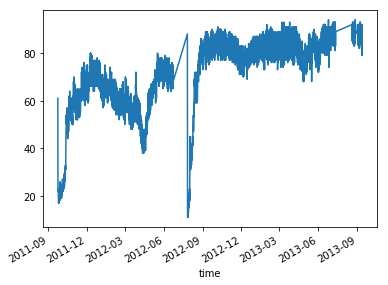

In [4]:
# Evaluate and plot
o = cosmos.eval(cosmos.native_coordinates)
o.plot()

## Reading a subset of file

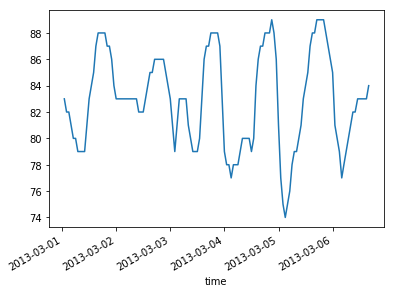

In [5]:
# Evaluate and plot a subset of the data
bounds = podpac.Coordinates([['2013-03-01', '2013-03-07']], ['time'])
coords = cosmos.native_coordinates.intersect(bounds)
o = cosmos.eval(coords)
o.plot()

# Creating PODPAC Node
If you read this type of CSV file regularly, it might be helpful to create PODPAC nodes with some default values.

In [6]:
# Define a new class, inhereting from podpac.data.CSV
class COSMOS_RH(podpac.data.CSV):
    time_col = 0  # Specify the time column coordinate
    data_col = 'RH(%)'  # Specify the data column header

# Repeat above with a different data column
class COSMOS_TEM(podpac.data.CSV):
    time_col = 0
    data_col = 'TEM(C)'


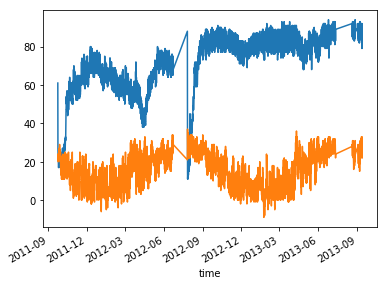

In [7]:
# Create instances of new classes, evaluate and plot
cosmos_rh = COSMOS_RH(source=filename)
cosmos_tem = COSMOS_TEM(source=filename)

# Use coordinates from one of the classes
coords = cosmos_rh.native_coordinates

cosmos_rh.eval(coords).plot()
cosmos_tem.eval(coords).plot()